In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
zmt = pd.read_csv("./data/zomato.csv")

In [5]:
zmt.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [6]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [8]:
print(zmt.shape[0] * zmt.shape[1])
print("{} = 전체 데이터의 {:.2f}%".format(zmt.isnull().sum().sum(), zmt.isnull().sum().sum() * 100 / (zmt.shape[0] * zmt.shape[1])))
zmt['name'].nunique()

879189
37700 = 전체 데이터의 4.29%


8792

In [9]:
zmt = zmt.drop(['url', 'phone', 'menu_item'], axis=1)
zmt.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [10]:
zmt.duplicated().sum()

50

In [11]:
zmt.drop_duplicates(inplace=True)

In [12]:
zmt.isnull().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7765
votes                              0
location                          21
rest_type                        227
dish_liked                     28041
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [14]:
zmt.dropna(how = 'any', inplace=True)

In [15]:
zmt.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [16]:
zmt = zmt.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})

In [17]:
print(zmt['cost'].unique())

['800' '300' '600' '700' '550' '500' '450' '650' '400' '750' '200' '850'
 '1,200' '150' '350' '250' '1,500' '1,300' '1,000' '100' '900' '1,100'
 '1,600' '950' '230' '1,700' '1,400' '1,350' '2,200' '2,000' '1,800'
 '1,900' '180' '330' '2,500' '2,100' '3,000' '2,800' '3,400' '40' '1,250'
 '3,500' '4,000' '2,400' '1,450' '3,200' '6,000' '1,050' '4,100' '2,300'
 '120' '2,600' '5,000' '3,700' '1,650' '2,700' '4,500']


In [19]:
zmt['cost'] = zmt['cost'].astype(str)
zmt['cost'] = zmt['cost'].replace(',' ,'', regex=True)

zmt['cost'] = zmt['cost'].astype(float)
zmt['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [20]:
zmt['rate'] = zmt['rate'].astype(str)
zmt['rate'] = zmt['rate'].replace('/5', '', regex=True)
zmt['rating'] = zmt['rate'].replace('NEW', '-', regex=True)
zmt = zmt.loc[zmt['rate'] != 'NEW'].reset_index(drop=True)


In [21]:
zmt

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,type,city,rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23242,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,"[('Rated 3.0', ""RATED\n Nice place to hangout...",Pubs and bars,Whitefield,3.8
23243,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,"[('Rated 4.0', 'RATED\n Went there post dinne...",Pubs and bars,Whitefield,3.9
23244,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,"[('Rated 3.0', 'RATED\n Place is good not tha...",Pubs and bars,Whitefield,2.8
23245,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield,2.5


In [22]:
zmt['rating'] = zmt['rating'].replace('-', '0', regex=True)
zmt['rating'] = zmt['rating'].astype(float)

In [24]:
zmt['online_order'] = zmt['online_order'].map({"Yes": 1, "No": 0}).astype(int)
zmt['book_table'] = zmt['book_table'].map({"Yes": 1, "No":0}).astype(int)

Text(0, 0.5, '레스토랑 이름')

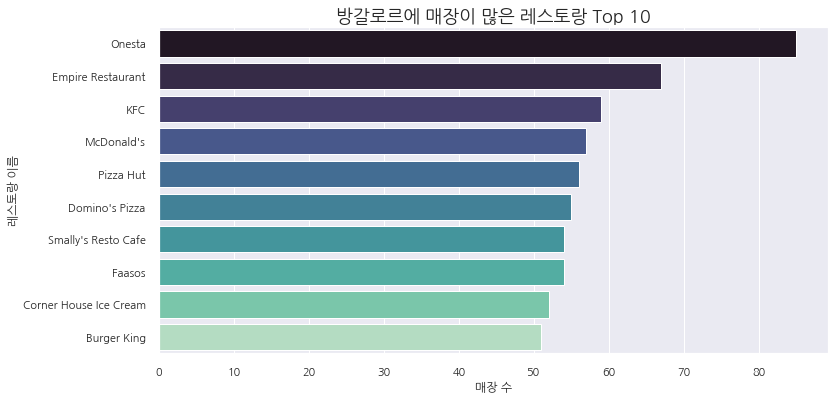

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.barplot(x=zmt['name'].value_counts()[:10], y = zmt['name'].value_counts()[:10].index, palette='mako')
plt.title("방갈로르에 매장이 많은 레스토랑 Top 10", size=18)
plt.xlabel("매장 수")
plt.ylabel("레스토랑 이름")

Text(0, 0.5, '레스토랑 타입')

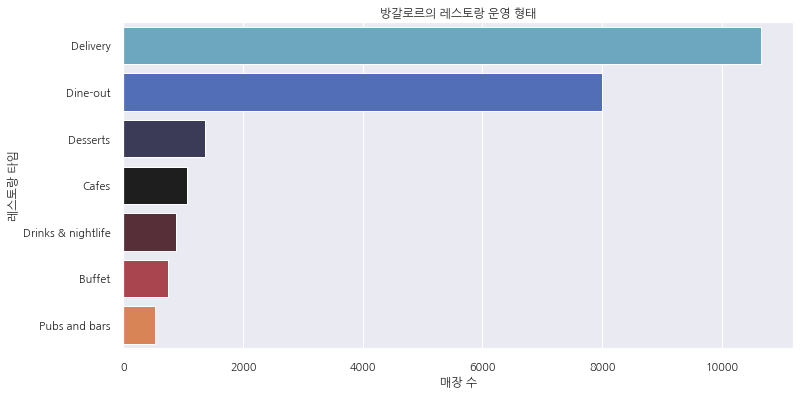

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x=zmt['type'].value_counts()[:10], y=zmt['type'].value_counts()[:10].index, palette='icefire')
plt.title("방갈로르의 레스토랑 운영 형태")
plt.xlabel("매장 수")
plt.ylabel("레스토랑 타입")

Text(0, 0.5, '')

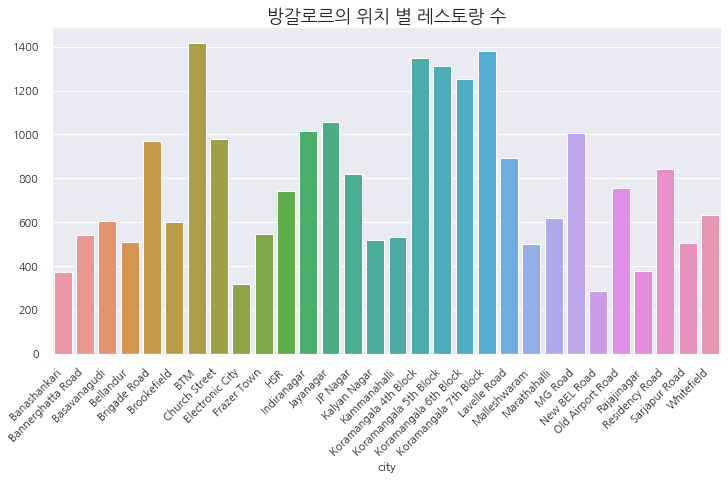

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.countplot(zmt['city'], ax=ax)
sns.countplot(zmt['city']).set_xticklabels(sns.countplot(zmt['city']).get_xticklabels(), rotation=45, ha="right")
plt.title("방갈로르의 위치 별 레스토랑 수", size=18)
plt.ylabel('')

Text(0, 0.5, '')

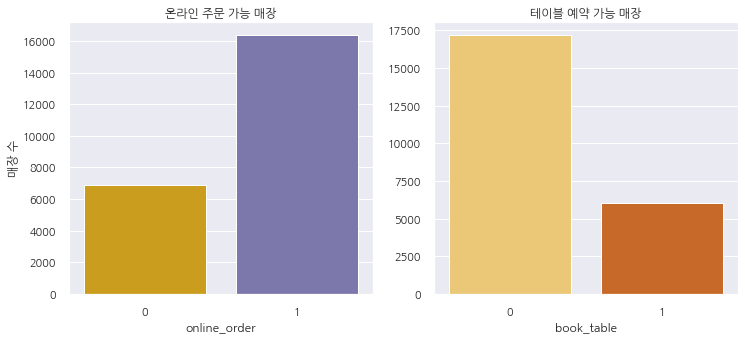

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(zmt['online_order'], palette='Dark2_r', ax=ax[0])

ax[0].set_title("온라인 주문 가능 매장")
ax[0].set_ylabel("매장 수")

sns.countplot(zmt['book_table'], palette='YlOrBr', ax=ax[1])
ax[1].set_title("테이블 예약 가능 매장")
ax[1].set_ylabel('')

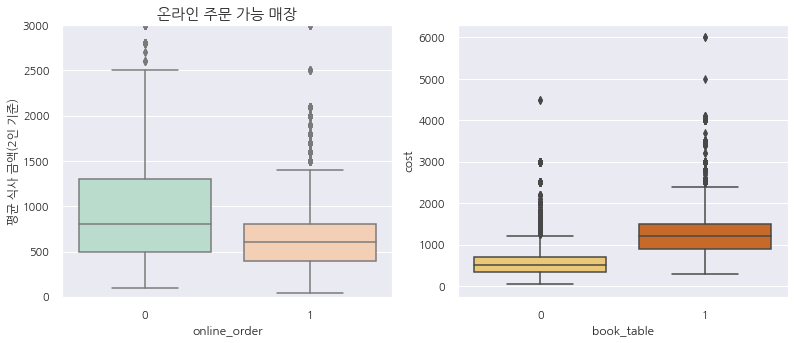

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))

sns.boxplot(x=zmt['online_order'], y=zmt['cost'], palette='Pastel2', ax=ax[0])
ax[0].set_title("온라인 주문 가능 매장", size=15)
ax[0].set_ylabel("평균 식사 금액(2인 기준)")
ax[0].set_ylim(0, 3000)

sns.boxplot(x=zmt['book_table'], y=zmt['cost'], palette='YlOrBr', ax=ax[1])

Text(0, 0.5, '')

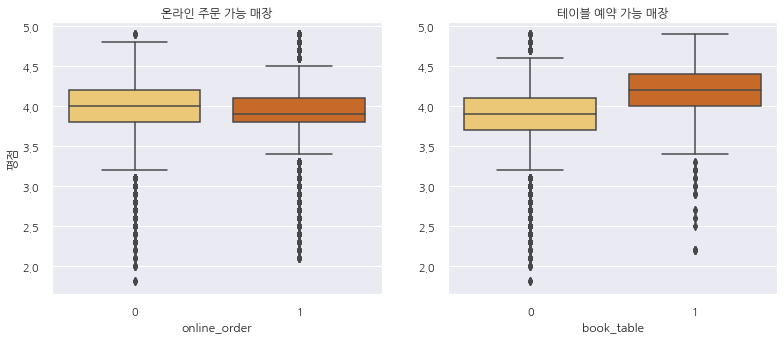

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))

sns.boxplot(x=zmt['online_order'], y=zmt['rating'], palette='YlOrBr', ax=ax[0])
ax[0].set_title("온라인 주문 가능 매장")
ax[0].set_ylabel("평점")

sns.boxplot(x=zmt['book_table'], y=zmt['rating'], palette='YlOrBr', ax=ax[1])
ax[1].set_title("테이블 예약 가능 매장")
ax[1].set_ylabel('')

Text(0, 0.5, '')

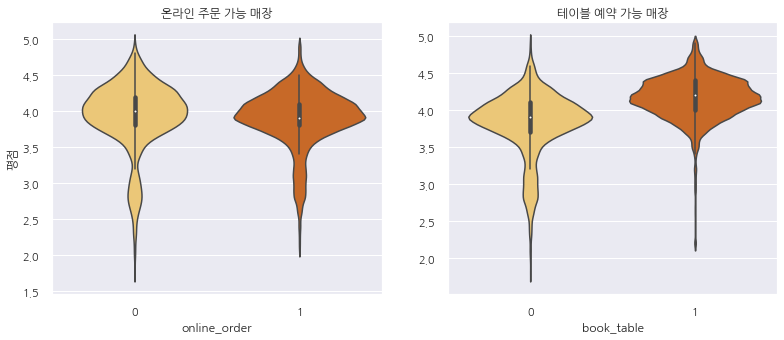

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))

sns.violinplot(x=zmt['online_order'], y=zmt['rating'], palette='YlOrBr', ax=ax[0])
ax[0].set_title("온라인 주문 가능 매장")
ax[0].set_ylabel("평점")

sns.violinplot(x=zmt['book_table'], y=zmt['rating'], palette='YlOrBr', ax=ax[1])
ax[1].set_title("테이블 예약 가능 매장")
ax[1].set_ylabel('')

In [43]:
pd.crosstab(zmt['rate'], zmt['online_order'])

online_order,0,1
rate,,
1.8,2,0
1.8,3,0
2.0,4,0
2.0,7,0
2.1,4,7
...,...,...
4.7,62,24
4.8,11,12
4.8,23,20


In [44]:
a = pd.crosstab(zmt['rate'], zmt['online_order'])

In [45]:
b = pd.crosstab(zmt['rate'], zmt['book_table'])

Text(0.5, 0, 'Ratings')

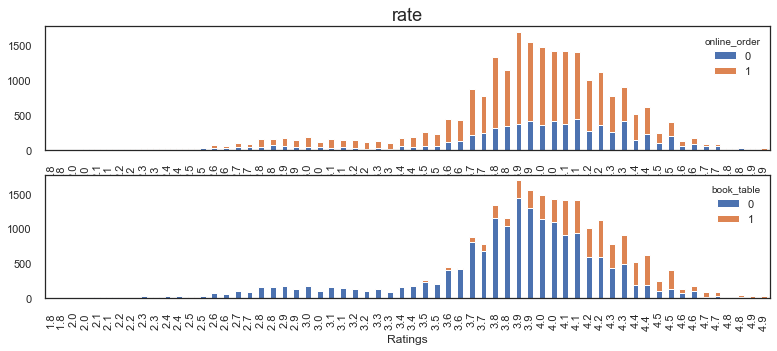

In [48]:
fig, ax = plt.subplots(2, 1, figsize=(13, 5))

sns.set_style('white')

a.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('rate', size=18)
plt.ylabel('')
plt.xlabel('')

b.plot(kind='bar', stacked=True, ax=ax[1])
plt.ylabel('')
plt.xlabel('Ratings')

In [50]:
from wordcloud import WordCloud, STOPWORDS

In [51]:
zmt_re = zmt.copy()

In [52]:
zmt_re['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe', 'Delivery',
       'Dessert Parlor', 'Pub', 'Beverage Shop', 'Bar',
       'Takeaway, Delivery', 'Food Truck', 'Quick Bites, Dessert Parlor',
       'Pub, Casual Dining', 'Casual Dining, Bar', 'Bakery', 'Sweet Shop',
       'Dessert Parlor, Beverage Shop', 'Beverage Shop, Quick Bites',
       'Microbrewery, Casual Dining', 'Sweet Shop, Quick Bites', 'Lounge',
       'Food Court', 'Cafe, Bakery', 'Microbrewery', 'Kiosk', 'Pub, Bar',
       'Casual Dining, Pub', 'Cafe, Quick Bites', 'Lounge, Bar',
       'Bakery, Quick Bites', 'Dessert Parlor, Quick Bites',
       'Bar, Casual Dining', 'Beverage Shop, Dessert Parlor',
       'Casual Dining, Microbrewery', 'Mess', 'Lounge, Casual Dining',
       'Cafe, Dessert Parlor', 'Dessert Parlor, Cafe',
       'Bakery, Dessert Parlor', 'Quick Bites, Sweet Shop', 'Takeaway',
       'Microbrewery, Pub', 'Club', 'Fine Dining', 'Baker

In [53]:
rest = zmt_re['rest_type'].value_counts()[:3].index

In [54]:
rest

Index(['Casual Dining', 'Quick Bites', 'Cafe'], dtype='object')

In [55]:
def zomato_wordcloud(rest):
  plt.figure(figsize=(20,20))
  for i, rest_tp in enumerate(rest):
    plt.subplot(1, 3, i+1)
    dishes=''
    data=zmt_re[zmt_re['rest_type'] == rest_tp]
    for word in data['dish_liked']:
      words = word.split()
      dishes = dishes + " ".join(words) + " "
    wordcloud = WordCloud(background_color='white', colormap='seismic', collocations=False, stopwords=stopwords, width=1200, height=1200).generate(dishes)
    plt.imshow(wordcloud)
    plt.title(rest_tp)
    plt.axis("off")


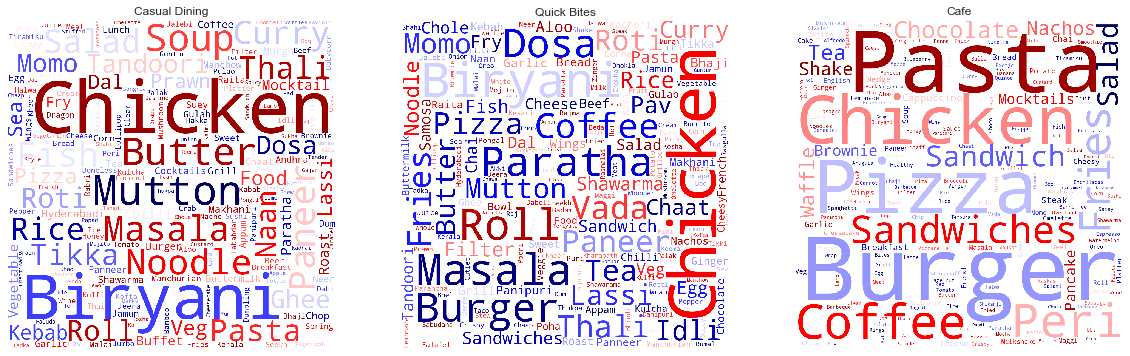

In [56]:
stopwords = set(STOPWORDS)
zomato_wordcloud(rest)

In [62]:
from textblob import TextBlob

In [60]:
!pip install textblob

In [66]:
sent_res = []
for i in range(0, len(zmt)):
  analysis = TextBlob(zmt.loc[i, 'reviews_list'])
  if analysis.sentiment.polarity > 0:
    sent_res.append('positive')
  elif analysis.sentiment.polarity == 0 :
    sent_res.append('neutral')
  else:
    sent_res.append('negative')
zmt['review_sent'] = sent_res

In [68]:
from plotly.subplots import make_subplots
import plotly.express as px

fig = px.scatter(zmt, x='rate', y='cost', size='votes', color='review_sent', log_x=True, size_max=60)
fig.show()